AMV Historical Data

In [1]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [2]:
# 2. Load data
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [3]:
df

0        3700.0
1        3600.0
2        3500.0
3        3500.0
4        3500.0
         ...   
1308    14144.0
1309    14594.0
1310    14414.0
1311    14865.0
1312    15225.0
Name: Price, Length: 1313, dtype: float64

In [4]:
# 3. Split train, test
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [5]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [7]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [8]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [9]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [10]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[24909.08379459 24927.73839372 24946.39299285 24965.04759198
 24983.70219111 25002.35679024 25021.01138937 25039.6659885
 25058.32058763 25076.97518676 25095.62978589 25114.28438502
 25132.93898415 25151.59358328 25170.24818241 25188.90278153
 25207.55738066 25226.21197979 25244.86657892 25263.52117805
 25282.17577718 25300.83037631 25319.48497544 25338.13957457
 25356.7941737  25375.44877283 25394.10337196 25412.75797109
 25431.41257022 25450.06716935]
Predicted closing prices for the next 60 days:
[24909.08379459 24927.73839372 24946.39299285 24965.04759198
 24983.70219111 25002.35679024 25021.01138937 25039.6659885
 25058.32058763 25076.97518676 25095.62978589 25114.28438502
 25132.93898415 25151.59358328 25170.24818241 25188.90278153
 25207.55738066 25226.21197979 25244.86657892 25263.52117805
 25282.17577718 25300.83037631 25319.48497544 25338.13957457
 25356.7941737  25375.44877283 25394.10337196 25412.75797109
 25431.41257022 25450.

In [11]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 9121.156406818576
MAPE: 67.32901119146321
MSLE: 0.27263381480703364


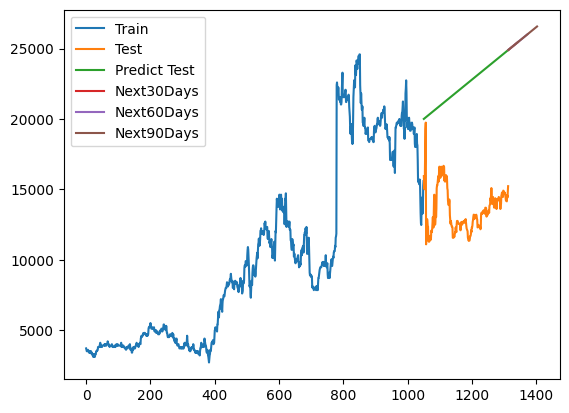

In [12]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()

DHT Historical Data

In [17]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [18]:
# 2. Load data
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [19]:
df

0        3700.0
1        3600.0
2        3500.0
3        3500.0
4        3500.0
         ...   
1308    14144.0
1309    14594.0
1310    14414.0
1311    14865.0
1312    15225.0
Name: Price, Length: 1313, dtype: float64

In [20]:
# 3. Split train, test
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [21]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [22]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [23]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [24]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [25]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [26]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[24909.08379459 24927.73839372 24946.39299285 24965.04759198
 24983.70219111 25002.35679024 25021.01138937 25039.6659885
 25058.32058763 25076.97518676 25095.62978589 25114.28438502
 25132.93898415 25151.59358328 25170.24818241 25188.90278153
 25207.55738066 25226.21197979 25244.86657892 25263.52117805
 25282.17577718 25300.83037631 25319.48497544 25338.13957457
 25356.7941737  25375.44877283 25394.10337196 25412.75797109
 25431.41257022 25450.06716935]
Predicted closing prices for the next 60 days:
[24909.08379459 24927.73839372 24946.39299285 24965.04759198
 24983.70219111 25002.35679024 25021.01138937 25039.6659885
 25058.32058763 25076.97518676 25095.62978589 25114.28438502
 25132.93898415 25151.59358328 25170.24818241 25188.90278153
 25207.55738066 25226.21197979 25244.86657892 25263.52117805
 25282.17577718 25300.83037631 25319.48497544 25338.13957457
 25356.7941737  25375.44877283 25394.10337196 25412.75797109
 25431.41257022 25450.

In [27]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 9121.156406818576
MAPE: 67.32901119146321
MSLE: 0.27263381480703364


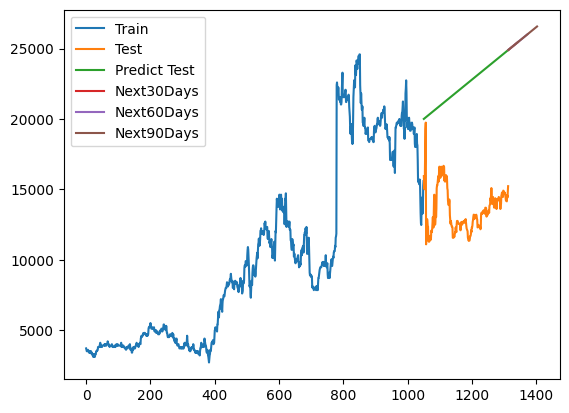

In [28]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()

DP3 Historical Data

In [29]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [30]:
# 2. Load data
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [31]:
df

0        3700.0
1        3600.0
2        3500.0
3        3500.0
4        3500.0
         ...   
1308    14144.0
1309    14594.0
1310    14414.0
1311    14865.0
1312    15225.0
Name: Price, Length: 1313, dtype: float64

In [32]:
# 3. Split train, test
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [33]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [34]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [35]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [36]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [37]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [38]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[24909.08379459 24927.73839372 24946.39299285 24965.04759198
 24983.70219111 25002.35679024 25021.01138937 25039.6659885
 25058.32058763 25076.97518676 25095.62978589 25114.28438502
 25132.93898415 25151.59358328 25170.24818241 25188.90278153
 25207.55738066 25226.21197979 25244.86657892 25263.52117805
 25282.17577718 25300.83037631 25319.48497544 25338.13957457
 25356.7941737  25375.44877283 25394.10337196 25412.75797109
 25431.41257022 25450.06716935]
Predicted closing prices for the next 60 days:
[24909.08379459 24927.73839372 24946.39299285 24965.04759198
 24983.70219111 25002.35679024 25021.01138937 25039.6659885
 25058.32058763 25076.97518676 25095.62978589 25114.28438502
 25132.93898415 25151.59358328 25170.24818241 25188.90278153
 25207.55738066 25226.21197979 25244.86657892 25263.52117805
 25282.17577718 25300.83037631 25319.48497544 25338.13957457
 25356.7941737  25375.44877283 25394.10337196 25412.75797109
 25431.41257022 25450.

In [39]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 9121.156406818576
MAPE: 67.32901119146321
MSLE: 0.27263381480703364


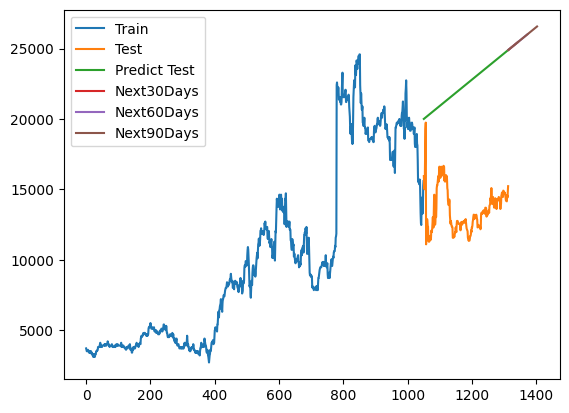

In [40]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()